In [1]:
##Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)

In [4]:
df_1

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
              ...  
1995-03-01     45.0
1995-04-01     52.0
1995-05-01     28.0
1995-06-01     40.0
1995-07-01     62.0
Name: Rose, Length: 187, dtype: float64

In [5]:
df_2 = pd.read_csv("Rose.csv")

In [6]:
df_2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [8]:
new = df_2.dropna()

In [9]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  185 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [10]:
df_2.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

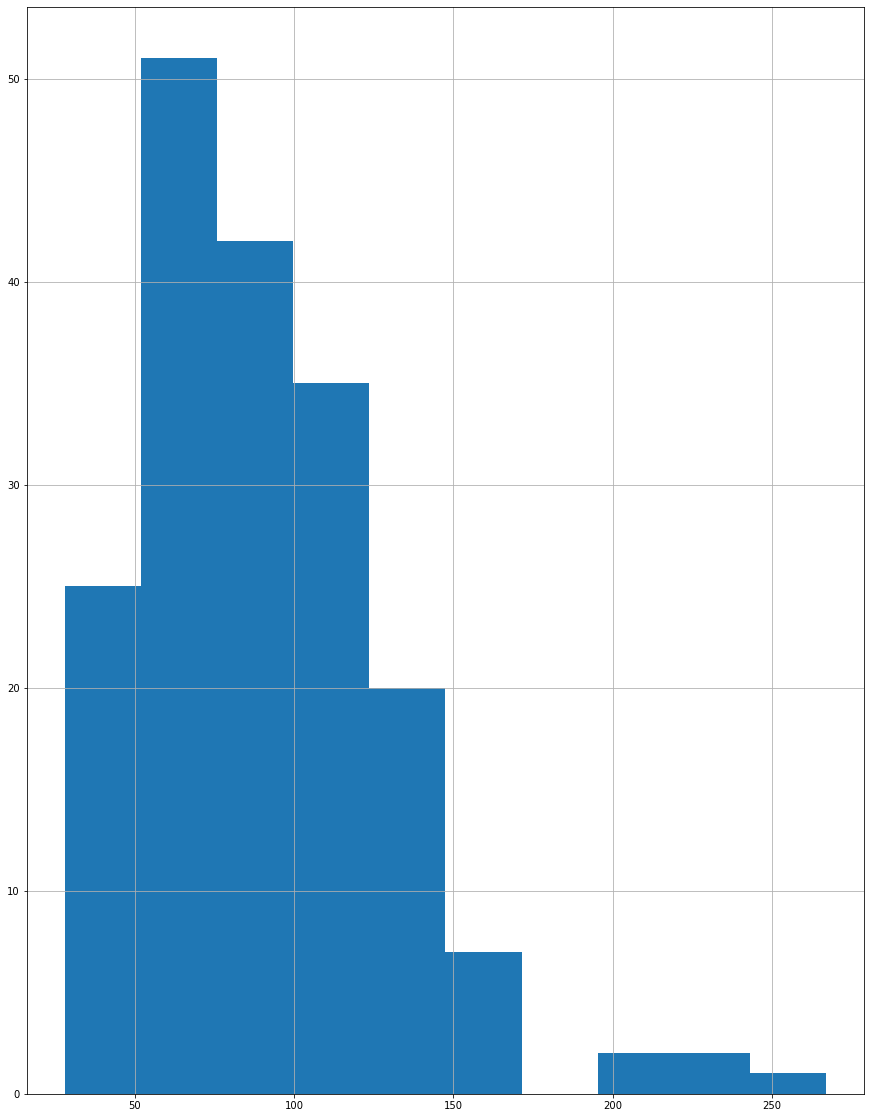

In [11]:
#Univariate analysis

df_1.hist(figsize=(15,20));

In [12]:
df_2.columns

Index(['YearMonth', 'Rose'], dtype='object')

In [13]:
import scipy.stats as stats

# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(new.Rose)]},
                        index=['Rose'])  

Skewness

Skewness
Rose  1.256176

In [14]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [15]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [16]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [17]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [18]:
df_1.describe()

count    185.000000
mean      90.394595
std       39.175344
min       28.000000
25%       63.000000
50%       86.000000
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

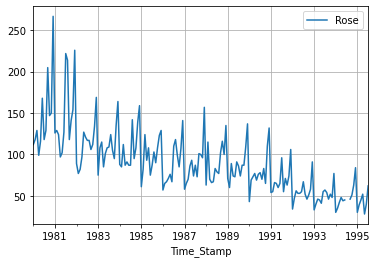

In [19]:
df.plot();
plt.grid()

date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

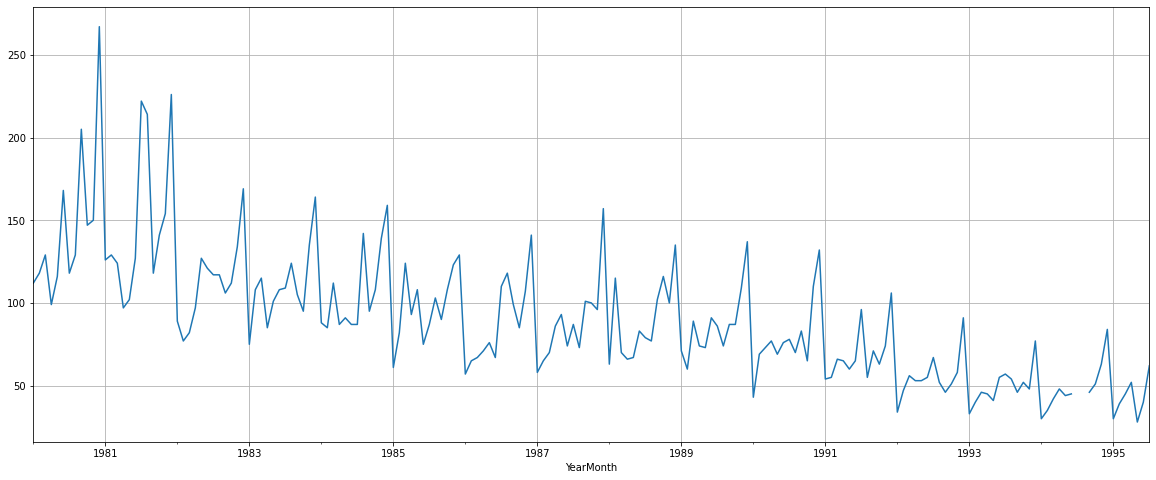

In [20]:
df_1.plot(figsize=(20,8))
plt.grid();

In [21]:
round(df.describe(),3)

Rose
count  185.000
mean    90.395
std     39.175
min     28.000
25%     63.000
50%     86.000
75%    112.000
max    267.000

In [22]:
df.shape

(187, 1)

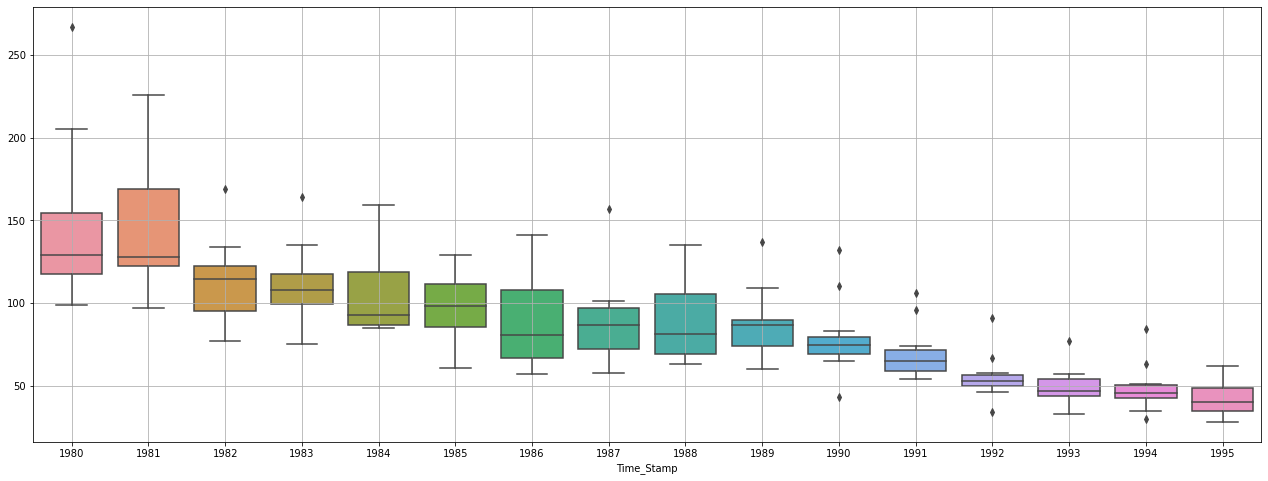

In [23]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

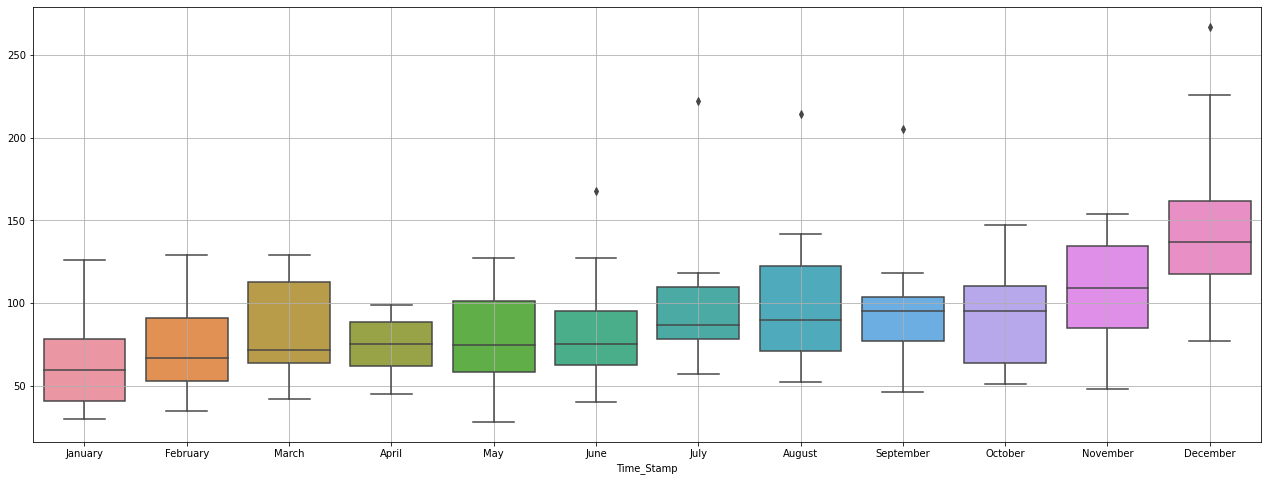

In [24]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

In [25]:
monthly_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_across_years

Time_Stamp  April  August  December  February  January   July   June  March  \
Time_Stamp                                                                    
1980         99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981         97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982         97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983         85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984         87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985         93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986         71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987         86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988         66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989         74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990         77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991         65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992         53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993         45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994         48.0     NaN      84.0      35.0     30.0    NaN   45.0   42.0   
1995         52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
1980        116.0     150.0    147.0      205.0  
1981        102.0     154.0    141.0      118.0  
1982        127.0     134.0    112.0      106.0  
1983        101.0     135.0     95.0      105.0  
1984         91.0     139.0    108.0       95.0  
1985        108.0     123.0    108.0       90.0  
1986         76.0     107.0     85.0       99.0  
1987         93.0      96.0    100.0      101.0  
1988         67.0     100.0    116.0      102.0  
1989         73.0     109.0     87.0       87.0  
1990         69.0     110.0     65.0       83.0  
1991         60.0      74.0     63.0       71.0  
1992         53.0      58.0     51.0       46.0  
1993         41.0      48.0     52.0       46.0  
1994         44.0      63.0     51.0       46.0  
1995         28.0       NaN      NaN        NaN

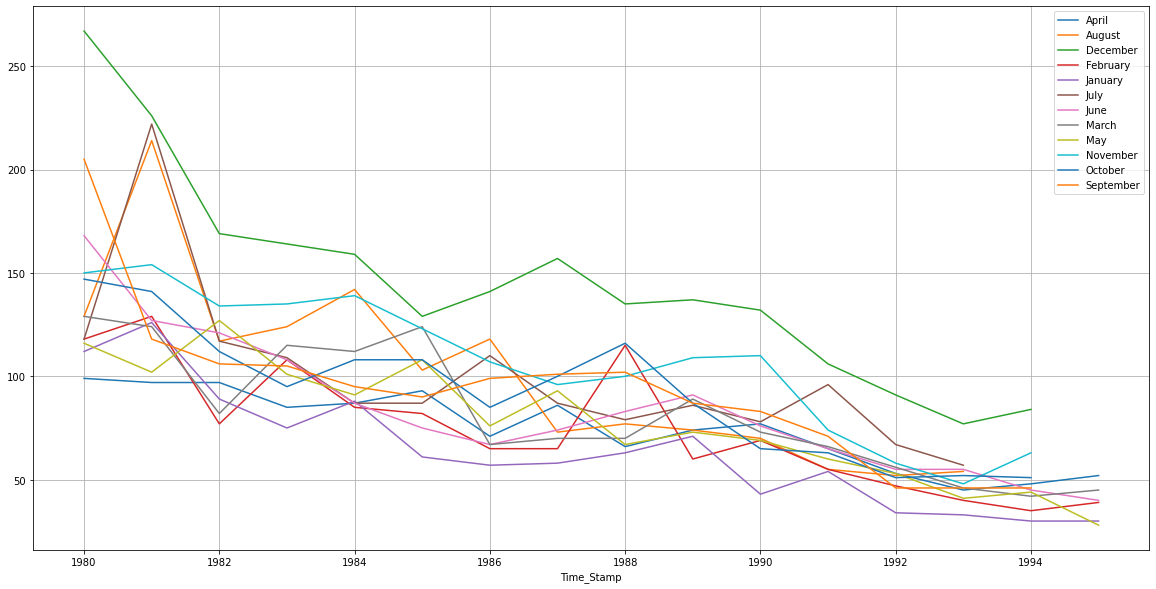

In [26]:
monthly_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [27]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [28]:
df = df.dropna()

In [29]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(53, 1)


In [31]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



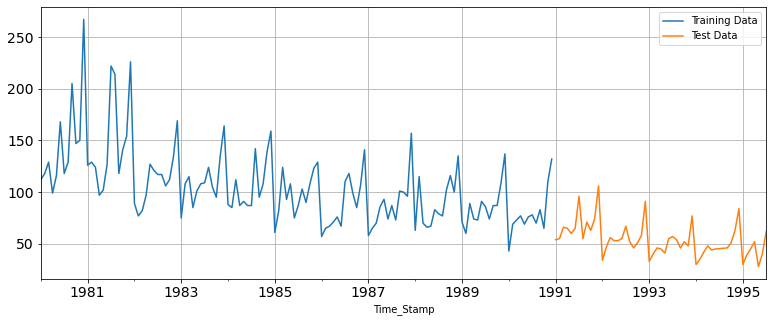

In [32]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model 1: Linear Regression

In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


In [34]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [35]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    91
1995-04-30  52.0    92
1995-05-31  28.0    93
1995-06-30  40.0    94
1995-07-31  62.0    95 



In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

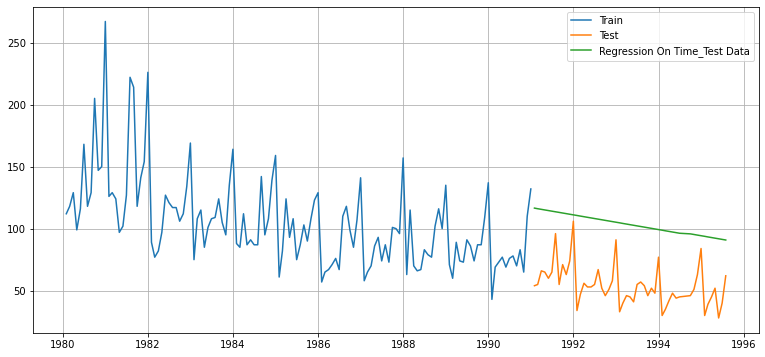

In [39]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [40]:
from sklearn import metrics

In [41]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.659


In [42]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  51.658895

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [43]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [44]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

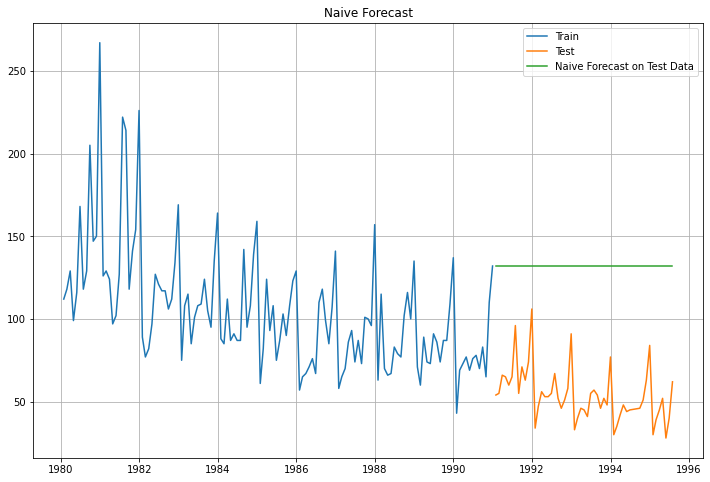

In [45]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [46]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.452


In [47]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  51.658895
NaiveModel        79.451540

In [48]:
## Method 3: Simple Average

In [49]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [50]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

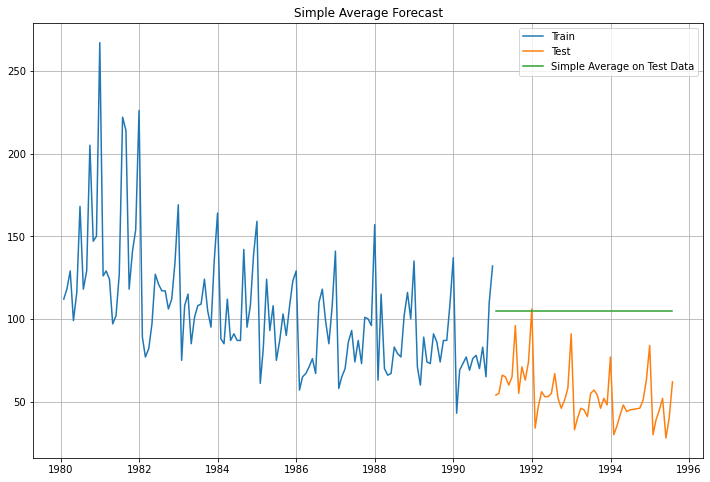

In [51]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [52]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.222


In [53]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    51.658895
NaiveModel          79.451540
SimpleAverageModel  53.221795

In [54]:
## Model 4 : Moving Average

In [55]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [56]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

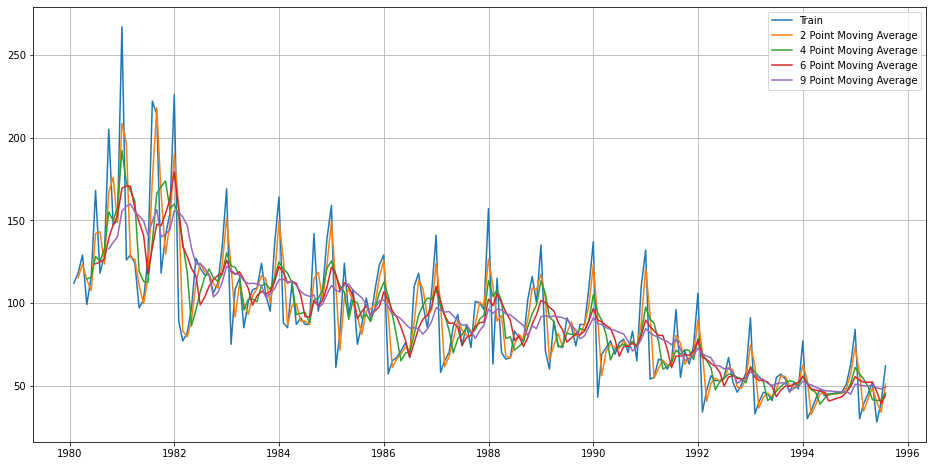

In [57]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [58]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:53] 
trailing_MovingAverage_test=MovingAverage[54:107]

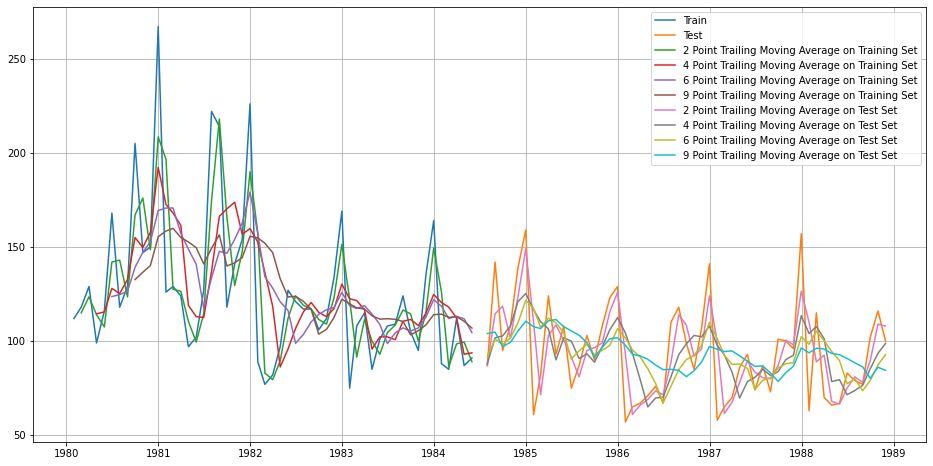

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [60]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 45.900
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 43.335
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 42.639
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 42.343 


In [61]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             51.658895
NaiveModel                   79.451540
SimpleAverageModel           53.221795
2pointTrailingMovingAverage  45.900271
4pointTrailingMovingAverage  43.335163
6pointTrailingMovingAverage  42.639228
9pointTrailingMovingAverage  42.343055

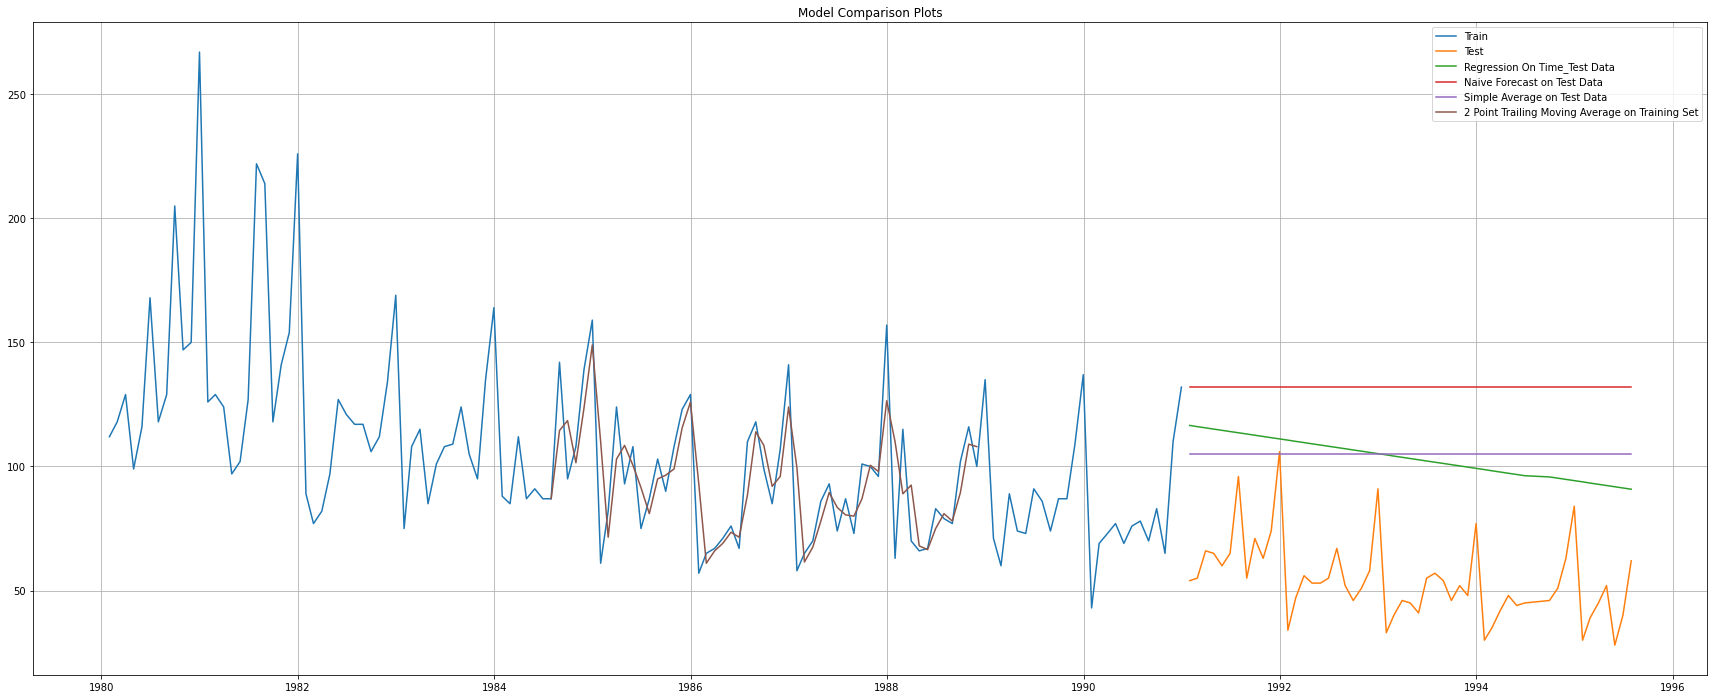

In [62]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [63]:
## Method 5: Simple Exponential Smoothing

In [64]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [65]:
SES_train = train.copy()
SES_test = test.copy()

In [66]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [67]:
model_SES_autofit = model_SES.fit(optimized=True)

In [68]:
model_SES_autofit.params

{'smoothing_level': 0.09874930910606859,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38712578461187,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104983
1991-02-28  55.0  87.104983
1991-03-31  66.0  87.104983
1991-04-30  65.0  87.104983
1991-05-31  60.0  87.104983

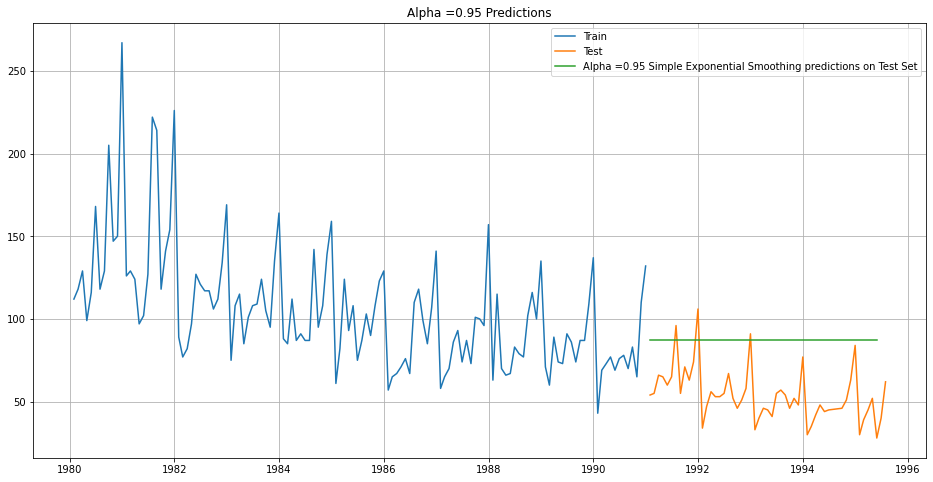

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.95 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.95 Predictions');

In [71]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [72]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

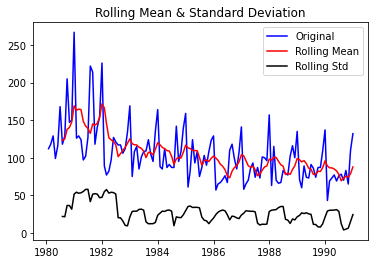

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [73]:
test_stationarity(train['Rose'])

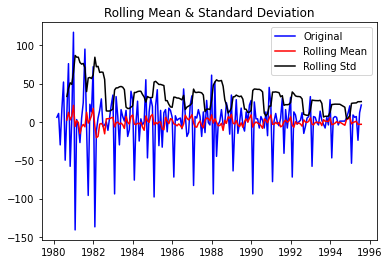

Results of Dickey-Fuller Test:
Test Statistic                -8.167161e+00
p-value                        8.819858e-13
#Lags Used                     1.200000e+01
Number of Observations Used    1.710000e+02
Critical Value (1%)           -3.469181e+00
Critical Value (5%)           -2.878595e+00
Critical Value (10%)          -2.575863e+00
dtype: float64 



In [74]:
test_stationarity(df['Rose'].diff().dropna())

In [75]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(1, 0, 0, 7)
Model: (0, 0, 2)(1, 0, 1, 7)


In [76]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC)


Empty DataFrame
Columns: [param, AIC]
Index: []


In [77]:
train['Rose']

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1990-08-31     70.0
1990-09-30     83.0
1990-10-31     65.0
1990-11-30    110.0
1990-12-31    132.0
Name: Rose, Length: 132, dtype: float64

In [78]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.4684057686407
ARIMA(0, 0, 2) - AIC:1306.5866794771462
ARIMA(1, 0, 0) - AIC:1301.5463044354742
ARIMA(1, 0, 1) - AIC:1294.5105851941642
ARIMA(1, 0, 2) - AIC:1292.0532102441548
ARIMA(2, 0, 0) - AIC:1302.346074176815
ARIMA(2, 0, 1) - AIC:1292.9371945620235
ARIMA(2, 0, 2) - AIC:1292.2480553293396


In [79]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5  (1, 0, 2)  1292.053210
8  (2, 0, 2)  1292.248055
7  (2, 0, 1)  1292.937195
4  (1, 0, 1)  1294.510585
3  (1, 0, 0)  1301.546304
6  (2, 0, 0)  1302.346074
1  (0, 0, 1)  1305.468406
2  (0, 0, 2)  1306.586679
0  (0, 0, 0)  1324.899703

In [80]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train['Rose'], order=(1,0,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                              ARMA Model Results                              
Dep. Variable:                   Rose   No. Observations:                  132
Model:                     ARMA(1, 2)   Log Likelihood                -641.027
Method:                       css-mle   S.D. of innovations             30.999
Date:                Sun, 07 Nov 2021   AIC                           1292.053
Time:                        19:30:53   BIC                           1306.467
Sample:                    01-31-1980   HQIC                          1297.910
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.8499     15.808      6.823      0.000      76.868     138.832
ar.L1.Rose     0.9861      0.018     53.661      0.000       0.950       1.022
ma.L1.Rose    -0.6873      0.098     -6.990      0.0

In [81]:
test.Rose= test.Rose.astype(float)
final_hat_avg =test.copy()
pred = results_Arima.forecast(steps=53)

In [82]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test.Rose,pred[0],squared=False)
print(rmse)

45.08848863126767


In [83]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(1,0,2)'])

resultsDf

RMSE
ARIMA(1,0,2)  45.088489

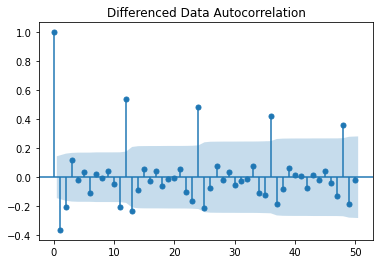

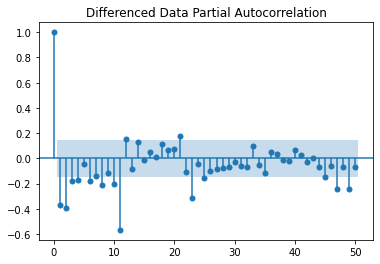

In [84]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [85]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,0,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:                   Rose   No. Observations:                  132
Model:                     ARMA(0, 0)   Log Likelihood                -660.450
Method:                           css   S.D. of innovations             36.034
Date:                Sun, 07 Nov 2021   AIC                           1324.900
Time:                        19:30:53   BIC                           1330.665
Sample:                    01-31-1980   HQIC                          1327.243
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9394      3.136     33.459      0.000      98.792     111.087


In [86]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [87]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

53.22179458863853


In [88]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,0,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE
ARIMA(1,0,2)  45.088489
ARIMA(0,0,0)  53.221795

In [89]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [90]:
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [91]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:1430.5761601623092
SARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:1300.5365808849817
SARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:1307.9062149190702
SARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:1226.1268586212143
SARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:1161.3073362727887
SARIMA(0, 0, 0)x(2, 0, 0, 7)7 - AIC:1183.6373372373673
SARIMA(0, 0, 0)x(2, 0, 1, 7)7 - AIC:1167.291765290431
SARIMA(0, 0, 0)x(2, 0, 2, 7)7 - AIC:1150.162243288433
SARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:1481.8198652085207
SARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:1358.0205113740553
SARIMA(0, 0, 1)x(0, 0, 2, 7)7 - AIC:1237.6142677601995
SARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:1296.0159286434796
SARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:1213.6211104479876
SARIMA(0, 0, 1)x(1, 0, 2, 7)7 - AIC:1145.0298411611316
SARIMA(0, 0, 1)x(2, 0, 0, 7)7 - AIC:1173.4463536501346
SARIMA(0, 0, 1)x(2, 0, 1, 7)7 - AIC:1164.42955319521
SARIMA(0, 0, 1)x(2, 0, 2, 7)7 - AIC:1145.862410895849
SARIMA(0, 0, 2)

In [92]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
47  (1, 0, 2)  (0, 0, 2, 7)  1105.275666
74  (2, 0, 2)  (0, 0, 2, 7)  1107.293147
77  (2, 0, 2)  (1, 0, 2, 7)  1109.337002
50  (1, 0, 2)  (1, 0, 2, 7)  1110.966118
80  (2, 0, 2)  (2, 0, 2, 7)  1113.168860

In [93]:
import statsmodels.api as sm

## SARIMA(1, 0, 2)(0, 0, 2, 7)
mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(1, 0, 2),
                                seasonal_order=(0, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 7)   Log Likelihood                -546.638
Date:                           Sun, 07 Nov 2021   AIC                           1105.276
Time:                                   19:31:10   BIC                           1121.745
Sample:                               01-31-1980   HQIC                          1111.961
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9953      0.001    998.588      0.000       0.993       0.997
ma.L1         -0.8199      0.127     -6.446

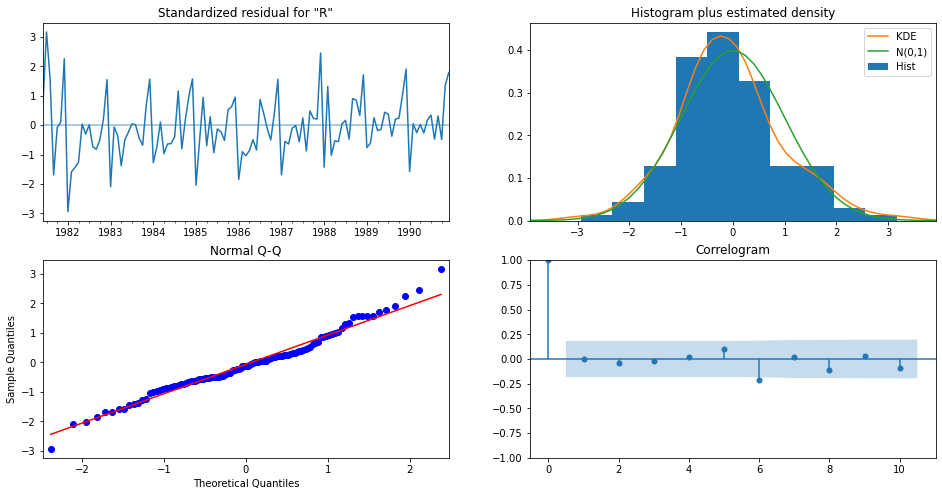

In [94]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [95]:
test.head()

Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

In [96]:
test.Rose= test.Rose.astype(float)
final_hat_avg =test.copy()
pred = results_SARIMA.get_forecast(steps=152)
pred.predicted_mean

1991-01-31    82.535400
1991-02-28    71.596004
1991-03-31    76.822144
1991-04-30    73.034399
1991-05-31    75.576028
                ...    
2003-04-30    37.633520
2003-05-31    37.457884
2003-06-30    37.283067
2003-07-31    37.109067
2003-08-31    36.935879
Freq: M, Name: predicted_mean, Length: 152, dtype: float64

In [97]:
pred.summary_frame()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  82.535400  27.575666      28.488087     136.582712
1991-02-28  71.596004  28.038461      16.641631     126.550377
1991-03-31  76.822144  28.037332      21.869983     131.774305
1991-04-30  73.034399  28.036214      18.084429     127.984369
1991-05-31  75.576028  28.035106      20.628230     130.523827
...               ...        ...            ...            ...
2003-04-30  37.633520  28.306840     -17.846866      93.113906
2003-05-31  37.457884  28.306652     -18.022134      92.937902
2003-06-30  37.283067  28.306466     -18.196586      92.762721
2003-07-31  37.109067  28.306281     -18.370225      92.588359
2003-08-31  36.935879  28.306099     -18.543055      92.414812

[152 rows x 4 columns]

In [98]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1, 0, 2)(0, 0, 2, 7)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

RMSE
ARIMA(1,0,2)                 45.088489
ARIMA(0,0,0)                 53.221795
SARIMA(1, 0, 2)(0, 0, 2, 7)  53.221795

In [99]:
## To get the real forecast for 7 days, we will rerun the model on the complete dataset

mod = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,0,1),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                   Rose   No. Observations:                  185
Model:             SARIMAX(0, 0, 1)x(2, 0, [1, 2], 7)   Log Likelihood                -796.715
Date:                                Sun, 07 Nov 2021   AIC                           1605.430
Time:                                        19:31:11   BIC                           1624.210
Sample:                                             0   HQIC                          1613.051
                                                - 185                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          7.0885      3.323      2.133      0.033       0.576      13.601
ar.

In [100]:
pred = results.get_forecast(steps=7)
pred.predicted_mean

185    45.142125
186    51.394632
187    47.468092
188    49.314536
189    44.087178
190    45.752959
191    46.424129
Name: predicted_mean, dtype: float64

In [101]:
pred.summary_frame()

Rose       mean    mean_se  mean_ci_lower  mean_ci_upper
185   45.142125  25.949570      -5.718097      96.002348
186   51.394632  26.206508       0.030820     102.758444
187   47.468092  26.206508      -3.895720      98.831905
188   49.314536  26.206508      -2.049276     100.678348
189   44.087178  26.206508      -7.276634      95.450990
190   45.752959  26.206158      -5.610166      97.116085
191   46.424129  26.188526      -4.904439      97.752697

In [102]:
## SARIMAX models

In [103]:
SARIMAX_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMAX_AIC)

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [104]:
## Let's first use SARIMAX with exogenous variable 

for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Rose'],exog=train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        SARIMAX_AIC = SARIMAX_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)


SARIMA(0, 0, 0)(0, 0, 0, 7) - AIC:-2771.624576122576
SARIMA(0, 0, 0)(0, 0, 1, 7) - AIC:-2621.308759077858
SARIMA(0, 0, 0)(0, 0, 2, 7) - AIC:-2470.9929420331405
SARIMA(0, 0, 0)(1, 0, 0, 7) - AIC:-2642.4967329413894
SARIMA(0, 0, 0)(1, 0, 1, 7) - AIC:-2619.308759077858
SARIMA(0, 0, 0)(1, 0, 2, 7) - AIC:-2468.9929420331405
SARIMA(0, 0, 0)(2, 0, 0, 7) - AIC:-2492.1809158966716
SARIMA(0, 0, 0)(2, 0, 1, 7) - AIC:-2490.1809158966716
SARIMA(0, 0, 0)(2, 0, 2, 7) - AIC:-2466.9929420331405
SARIMA(0, 0, 1)(0, 0, 0, 7) - AIC:-2748.436602259045
SARIMA(0, 0, 1)(0, 0, 1, 7) - AIC:-2598.120785214327
SARIMA(0, 0, 1)(0, 0, 2, 7) - AIC:-2447.8049681696093
SARIMA(0, 0, 1)(1, 0, 0, 7) - AIC:-2640.4967329413894
SARIMA(0, 0, 1)(1, 0, 1, 7) - AIC:-2596.120785214327
SARIMA(0, 0, 1)(1, 0, 2, 7) - AIC:-2445.8049681696093
SARIMA(0, 0, 1)(2, 0, 0, 7) - AIC:-2490.1809158966716
SARIMA(0, 0, 1)(2, 0, 1, 7) - AIC:-2488.1809158966716
SARIMA(0, 0, 1)(2, 0, 2, 7) - AIC:-2443.8049681696093
SARIMA(0, 0, 2)(0, 0, 0, 7) - AIC:

In [105]:
SARIMAX_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
0   (0, 0, 0)  (0, 0, 0, 7) -2771.624576
27  (1, 0, 0)  (0, 0, 0, 7) -2769.624576
9   (0, 0, 1)  (0, 0, 0, 7) -2748.436602
36  (1, 0, 1)  (0, 0, 0, 7) -2746.436602
54  (2, 0, 0)  (0, 0, 0, 7) -2746.436602

In [106]:
## SARIMA(1, 0, 2)(2, 0, 2, 7)
mod = sm.tsa.statespace.SARIMAX(train['Rose'],exog=train,
                                order=(1,0,2),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood                1218.308
Date:                           Sun, 07 Nov 2021   AIC                          -2418.617
Time:                                   19:31:20   BIC                          -2393.913
Sample:                               01-31-1980   HQIC                         -2408.590
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Rose           1.0000         -0       -inf      0.000       1.000       1.000
ar.L1               0         -0        nan

In [107]:
pred = results.get_forecast(steps=53,exog=test)
pred.predicted_mean

1991-01-31     54.0
1991-02-28     55.0
1991-03-31     66.0
1991-04-30     65.0
1991-05-31     60.0
1991-06-30     65.0
1991-07-31     96.0
1991-08-31     55.0
1991-09-30     71.0
1991-10-31     63.0
1991-11-30     74.0
1991-12-31    106.0
1992-01-31     34.0
1992-02-29     47.0
1992-03-31     56.0
1992-04-30     53.0
1992-05-31     53.0
1992-06-30     55.0
1992-07-31     67.0
1992-08-31     52.0
1992-09-30     46.0
1992-10-31     51.0
1992-11-30     58.0
1992-12-31     91.0
1993-01-31     33.0
1993-02-28     40.0
1993-03-31     46.0
1993-04-30     45.0
1993-05-31     41.0
1993-06-30     55.0
1993-07-31     57.0
1993-08-31     54.0
1993-09-30     46.0
1993-10-31     52.0
1993-11-30     48.0
1993-12-31     77.0
1994-01-31     30.0
1994-02-28     35.0
1994-03-31     42.0
1994-04-30     48.0
1994-05-31     44.0
1994-06-30     45.0
1994-07-31     46.0
1994-08-31     51.0
1994-09-30     63.0
1994-10-31     84.0
1994-11-30     30.0
1994-12-31     39.0
1995-01-31     45.0
1995-02-28     52.0


In [108]:
## Let's use SARIMAX with exogenous variable whose coefficients are allowed to vary over time 
## Time Varying Linear Model[TVLM] SARIMA(1, 0, 2)(2, 0, 2, 7)
mod = sm.tsa.statespace.SARIMAX(train['Rose'],exog=train,time_varying_regression=True,mle_regression=False,
                                order=(1,0,2),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood                1202.392
Date:                           Sun, 07 Nov 2021   AIC                          -2386.783
Time:                                   19:31:20   BIC                          -2362.157
Sample:                               01-31-1980   HQIC                         -2376.789
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -2.705e-08   1.54e-20  -1.75e+12      0.000    -2.7e-08    -2.7e-08
ma.L1               0   1.54e-20          0

In [109]:
pred = results.get_forecast(steps=53,exog=test)
pred.predicted_mean

1991-01-31     54.0
1991-02-28     55.0
1991-03-31     66.0
1991-04-30     65.0
1991-05-31     60.0
1991-06-30     65.0
1991-07-31     96.0
1991-08-31     55.0
1991-09-30     71.0
1991-10-31     63.0
1991-11-30     74.0
1991-12-31    106.0
1992-01-31     34.0
1992-02-29     47.0
1992-03-31     56.0
1992-04-30     53.0
1992-05-31     53.0
1992-06-30     55.0
1992-07-31     67.0
1992-08-31     52.0
1992-09-30     46.0
1992-10-31     51.0
1992-11-30     58.0
1992-12-31     91.0
1993-01-31     33.0
1993-02-28     40.0
1993-03-31     46.0
1993-04-30     45.0
1993-05-31     41.0
1993-06-30     55.0
1993-07-31     57.0
1993-08-31     54.0
1993-09-30     46.0
1993-10-31     52.0
1993-11-30     48.0
1993-12-31     77.0
1994-01-31     30.0
1994-02-28     35.0
1994-03-31     42.0
1994-04-30     48.0
1994-05-31     44.0
1994-06-30     45.0
1994-07-31     46.0
1994-08-31     51.0
1994-09-30     63.0
1994-10-31     84.0
1994-11-30     30.0
1994-12-31     39.0
1995-01-31     45.0
1995-02-28     52.0


In [110]:


full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1,0,2),
                                seasonal_order=(2, 0, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  185
Model:             SARIMAX(1, 0, 2)x(2, 0, 2, 7)   Log Likelihood                -775.735
Date:                           Sun, 07 Nov 2021   AIC                           1567.469
Time:                                   19:31:21   BIC                           1592.461
Sample:                                        0   HQIC                          1577.612
                                           - 185                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9942      0.001   1278.074      0.000       0.993       0.996
ma.L1         -0.8510      4.684     -0.182

In [111]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [112]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose       mean    mean_se  mean_ci_lower  mean_ci_upper
185   53.243145  23.976603       6.249867     100.236424
186   51.671531  24.240506       4.161013      99.182050
187   50.257835  24.240006       2.748297      97.767373
188   50.212951  24.239511       2.704382      97.721520
189   49.952351  24.239023       2.444739      97.459962

In [115]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 31.488627395270406


In [116]:
import math
rmse_SARIMAX_timevarying = math.sqrt(mean_squared_error(test.Rose ,pred.predicted_mean))
print(rmse_SARIMAX_timevarying)

0.0


In [117]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse_SARIMAX_timevarying]}
                           ,index=['SARIMAX_tvlm(1,0,2)(2,0,2)7'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

RMSE
ARIMA(1,0,2)                 45.088489
ARIMA(0,0,0)                 53.221795
SARIMA(1, 0, 2)(0, 0, 2, 7)  53.221795
SARIMAX_tvlm(1,0,2)(2,0,2)7   0.000000